<a href="https://colab.research.google.com/github/sbumesh/Prototype/blob/main/devopsSFTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://buildmedia.readthedocs.org/media/pdf/pytest/latest/pytest.pdf


In [27]:
%%writefile /content/sample_data/ftpPoc.py

from ftplib import FTP
import pytest
def getFTPCon(folder='/pub/example'):
    ftp = FTP('test.rebex.net', 'demo', 'password')
    ftp.cwd(folder)
    return ftp


def getWelcomeMessage(ftp) :
    return ftp.getwelcome()


def getFileFromFTP(ftp, fileToGet='winceclient.png') :
    
    with open('/tmp/{0}'.format(fileToGet), 'wb') as f:
        ftp.retrbinary('RETR ' + fileToGet, f.write)
    return f

# def putFileToFTP(ftp, fileToput='/content/sample_data/mnist_test.csv') :
#   file = open(fileToput,'rb')                  # file to send
#   ftp.storbinary('STOR kitten.jpg', file)     # send the file
#                                       # close file and FTP
  

def getFtpDir(ftp,folder='/' ) :
    listdir=[]     
    # ftp = getFTPCon()    
    ftp.cwd(folder) 
    ftp.retrlines("NLST" ,listdir.append ) 
    return listdir


def downloadFTPFolder(ftp ) :
    mylist = getFtpDir(ftp )
    for aItem in mylist :
            getFileFromFTP(ftp,fileToGet=aItem) 
            writeToFolder(filename = aItem ,tmpFile = '/content/sample_data/{0}'.format(aItem))




##########################################
### pytest main  
######################################
import pytest
@pytest.fixture
def ftp() :
    f =  getFTPCon(folder='/') 
    return f

def test_getFTPCon(folder='/'  ):
    assert  type(getFTPCon(folder='/')  ) is FTP 
    assert   getWelcomeMessage(ftp) == '220 Microsoft FTP Service'
def test_getWelcomeMessage(ftp)  :        
     
    assert   getWelcomeMessage(ftp) == '220 Microsoft FTP Service'
    assert  type(getWelcomeMessage(ftp)) is   str 

def  test_getFtpDir(ftp ) :
   assert   getFtpDir(ftp,'/' )==['pub','readme.txt'] 
   assert   getFtpDir(ftp,'pub' )==['example1']  
   assert   'pop3-console-client.png' in getFtpDir(ftp,'/pub/example' ) 

def  test_getFtpDirOfpub(ftp ) :
   assert   getFtpDir(ftp,'pub' )==['example1'] 
   
def  test_getFtpDirofexample(ftp ) :   
   assert   'pop3-console-client.png' in getFtpDir(ftp,'/pub/example' ) 
    
def  test_getFileFromFTP(ftp,fileToGet='readme.txt') :
   assert    getFileFromFTP(ftp,fileToGet='readme.txt') .name  == '/tmp/readme.txt' 

Overwriting /content/sample_data/ftpPoc.py


In [15]:
type(getFTPCon(folder='/pub/example')  ) is FTP1

NameError: ignored

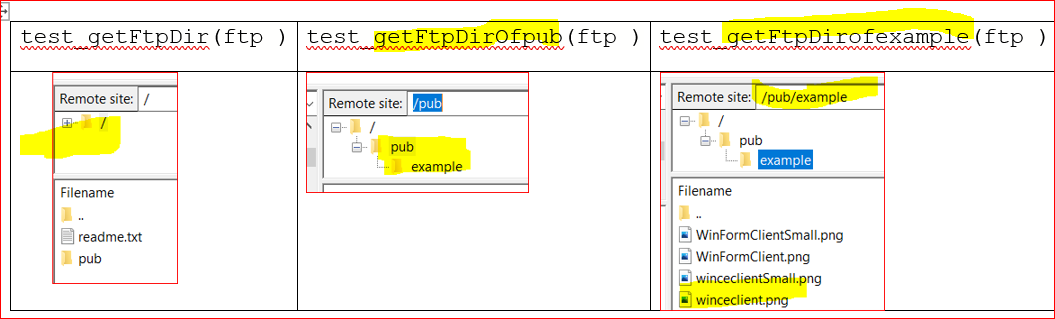

In [31]:
!pytest -v /content/sample_data/ftpPoc.py


============================= test session starts ==============================
platform linux -- Python 3.7.13, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 6 items                                                              

sample_data/ftpPoc.py::test_getFTPCon FAILED                             [ 16%]
sample_data/ftpPoc.py::test_getWelcomeMessage PASSED                     [ 33%]
sample_data/ftpPoc.py::test_getFtpDir FAILED                             [ 50%]
sample_data/ftpPoc.py::test_getFtpDirOfpub FAILED                        [ 66%]
sample_data/ftpPoc.py::test_getFtpDirofexample PASSED                    [ 83%]
sample_data/ftpPoc.py::test_getFileFromFTP PASSED                        [100%]

=================================== FAILURES ===================================
________________________________ test_getFTPCon ________________________________

folder = '/'

    def test

In [ ]:
%%writefile /content/sample_data/ftpPoc.py

from ftplib import FTP
import pytest
def getFTPCon(folder='/pub/example'):
    ftp = FTP('test.rebex.net', 'demo', 'password')
    ftp.cwd(folder)
    return ftp


def getWelcomeMessage(ftp) :
    return ftp.getwelcome()


def getFileFromFTP(ftp, fileToGet='winceclient.png') :
    
    with open('/tmp/{0}'.format(fileToGet), 'wb') as f:
        ftp.retrbinary('RETR ' + fileToGet, f.write)
    return f

def putFileToFTP(ftp, fileToput='/content/sample_data/mnist_test.csv') :
  file = open(fileToput,'rb')                  # file to send
  ftp.storbinary('STOR kitten.jpg', file)     # send the file
                                      # close file and FTP
  

def getFtpDir(ftp,folder='/' ) :
    listdir=[]     
    # ftp = getFTPCon()    
    ftp.cwd(folder) 
    ftp.retrlines("NLST" ,listdir.append ) 
    return listdir
def downloadFTPFolder(ftp ) :
    mylist = getFtpDir(ftp )
    for aItem in mylist :
            getFileFromFTP(ftp,fileToGet=aItem) 
            writeToFolder(filename = aItem ,tmpFile = '/content/sample_data/{0}'.format(aItem))
'''
def test_main( ):
    ftp = getFTPCon() 
    ftp.cwd('/pub')
    assert getWelcomeMessage(ftp) == '2201 Microsoft FTP Service'
    assert getFtpDir(ftp ) == ['example12']  
'''  
@pytest.fixture
def ftp() :
    f = getFTPCon(folder='/') 
    return f

#ftp = getFTPCon(folder='/pub')


Overwriting /content/sample_data/ftpPoc.py


In [ ]:
%%writefile /content/sample_data/ftptest.py
from    ftpPoc import *
import pytest
@pytest.fixture
def ftp() :
    f =  getFTPCon(folder='/') 
    return f
def test_getWelcomeMessage(ftp)  :        
     
    assert   getWelcomeMessage(ftp) == '220 Microsoft FTP Service'
    assert  type(getWelcomeMessage(ftp)) is   str 

def  test_getFtpDir(ftp ) :
   assert   getFtpDir(ftp,'/' )==['pub','readme.txt'] 
   assert   getFtpDir(ftp,'pub' )==['example1']  
   assert   'pop3-console-client.png' in getFtpDir(ftp,'/pub/example' ) 

def  test_getFtpDirOfpub(ftp ) :
   assert   getFtpDir(ftp,'pub' )==['example1'] 
   
def  test_getFtpDirofexample(ftp ) :   
   assert   'pop3-console-client.png' in getFtpDir(ftp,'/pub/example' ) 
    
def  test_getFileFromFTP(ftp,fileToGet='readme.txt') :
   assert    getFileFromFTP(ftp,fileToGet='readme.txt') .name  == '/tmp/readme.txt' 

Overwriting /content/sample_data/ftptest.py


In [ ]:
!pytest  -v  /content/sample_data/ftptest.py

============================= test session starts ==============================
platform linux -- Python 3.7.13, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 5 items                                                              

sample_data/ftptest.py::test_getWelcomeMessage PASSED                    [ 20%]
sample_data/ftptest.py::test_getFtpDir FAILED                            [ 40%]
sample_data/ftptest.py::test_getFtpDirOfpub FAILED                       [ 60%]
sample_data/ftptest.py::test_getFtpDirofexample PASSED                   [ 80%]
sample_data/ftptest.py::test_getFileFromFTP PASSED                       [100%]

=================================== FAILURES ===================================
________________________________ test_getFtpDir ________________________________

ftp = <ftplib.FTP object at 0x7f73432e5a50>

    def  test_getFtpDir(ftp ) :
       assert   getFtpDir(ftp

In [ ]:
!pytest -v     /content/sample_data/ftptest.py

============================= test session starts ==============================
platform linux -- Python 3.7.13, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 5 items                                                              

sample_data/ftptest.py::test_getWelcomeMessage ERROR                     [ 20%]
sample_data/ftptest.py::test_getFtpDir ERROR                             [ 40%]
sample_data/ftptest.py::test_getFtpDirOfpub ERROR                        [ 60%]
sample_data/ftptest.py::test_getFtpDirofexample ERROR                    [ 80%]
sample_data/ftptest.py::test_getFileFromFTP ERROR                        [100%]

==================================== ERRORS ====================================
___________________ ERROR at setup of test_getWelcomeMessage ___________________

    @pytest.fixture
    def ftp() :
>       f = ftpPoc.getFTPCon(folder='/')
E       NameError: name 'ftpP

In [ ]:
ftp = getFTPCon(folder='/') 
f=  getFileFromFTP(ftp,fileToGet='readme.txt')
# mylist = getFtpDir(ftp )
# f= getFileFromFTP(ftp,fileToGet='readme.txt')
print( f.name  == '/tmp/readme.txt' )
# for aItem in mylist :
#     print( type(aItem) )
#     if '.txt' in aItem :
#       f= getFileFromFTP(ftp,fileToGet=aItem) 

True
